In [1]:
import matplotlib.pyplot as plt
import numpy as np
def hypothesis(theta, X, n):
    h = np.ones((X.shape[0],1))
    theta = theta.reshape(1,n+1)
    for i in range(0,X.shape[0]):
        h[i] = float(np.matmul(theta, X[i]))
    h = h.reshape(X.shape[0])
    return h

In [2]:
def BGD(theta, alpha, num_iters, h, X, y, n):
    cost = np.ones(num_iters, dtype=np.float64)
    for i in range(0,num_iters):
        theta[0] = theta[0] - (alpha/X.shape[0]) * sum(h - y)
        for j in range(1,n+1):
            theta[j] = theta[j] - (alpha/X.shape[0]) * sum((h-y) * X.transpose()[j])
        h = hypothesis(theta, X, n)
        cost[i] = (1.0/X.shape[0]) * 0.5 * float(sum(np.square(h - y)))
    theta = theta.reshape(1,n+1)
    return theta, cost

In [3]:
def linear_regression(X, y, alpha, num_iters):
    #n = X.shape[1]
    one_column = np.ones((X.shape[0],1))
    X = np.concatenate((one_column, X), axis = 1)
    # initializing the parameter vector...
    theta = np.zeros(n+1)
    # hypothesis calculation....
    h = hypothesis(theta, X, n)
    # returning the optimized parameters by Gradient Descent...
    theta, cost = BGD(theta,alpha,num_iters,h,X,y,n)
    return theta, cost

In [4]:
import random
filename = input("Enter file name: ")
data = np.loadtxt(filename, delimiter=',')

random.shuffle(data)

l=len(data)
X_train = data[:int((l+1)*.80),[0,1]] #feature set
y_train = data[:int((l+1)*.80),2] #label set
mean = np.ones(X_train.shape[1])
std = np.ones(X_train.shape[1])
for i in range(0, X_train.shape[1]):
    mean[i] = np.mean(X_train.transpose()[i])
    std[i] = np.std(X_train.transpose()[i])
    for j in range(0, X_train.shape[0]):
        X_train[j][i] = (X_train[j][i] - mean[i])/std[i]

x_test = data[int(l*.80+1):,[0,1]]
y_test = data[int(l*.80+1):,2]
n = X_train.shape[1]

Enter file name: data.txt


In [5]:
def ContourPlot(theta,X,y):
    one_column = np.ones((X.shape[0],1))
    X = np.concatenate((one_column, X), axis = 1)
    
    x_data = theta[0,1]
    y_data = theta[0,2]
    
    xModel = np.linspace(-1000, 1000, num=100)
    yModel = np.linspace(-1000, 1000, num=100)
    Th1, Th2 = np.meshgrid(xModel, yModel)
    fig = plt.figure(figsize=(6,5))
    left, bottom, width, height = 0.1, 0.1, 0.8, 0.8
    ax = fig.add_axes([left, bottom, width, height]) 

    thetaDup = theta.copy()
    Z = np.zeros((len(xModel), len(yModel)))
    print(X)
    for i in range(0,len(xModel)):
        thetaDup[0,1] = xModel[i]
        for j in range(0, len(yModel)):
            thetaDup[0,2] = yModel[j]
            h = hypothesis(thetaDup, X, n)
            Z[i][j] =( (1.0/X.shape[0]) * 0.5 * float(sum(np.square(h - y))))
    
    cp = plt.contour(Th1, Th2, Z)
    ax.clabel(cp, inline=True, fontsize=10)
    ax.set_title('Contour Plot')
    ax.set_xlabel('Theta 1')
    ax.set_ylabel('Theta 2')
    plt.show()

def main(alpha, l, xt, yt):
    
    theta, cost = linear_regression(X_train, y_train,alpha, 30000)
    cost = list(cost)
    print (theta)
    #print cost
    
    one_column1 = np.ones((xt.shape[0],1))
    xt = np.concatenate((one_column1, xt), axis = 1)
    h=hypothesis(theta, xt, n)
    print ("Average error: "+str((h - yt).mean()))
    print ("RMS error: "+str(np.sqrt(((h - yt) ** 2).mean())))
    
    n_iterations = [x for x in range(1,30001)]
    plt.plot(n_iterations, cost)
    plt.xlabel('No. of iterations')
    plt.ylabel('Cost')
    ContourPlot(theta,X_train,y_train)
    


[[356228.84210526 128335.82693942 -14555.14122206]]
Average error: 239232611.0499286
RMS error: 247620434.22553426
[[ 1.00000000e+00  8.40512606e-02 -4.56171553e-01]
 [ 1.00000000e+00  8.40512606e-02 -4.56171553e-01]
 [ 1.00000000e+00 -5.92314177e-01 -4.56171553e-01]
 [ 1.00000000e+00 -5.92314177e-01 -4.56171553e-01]
 [ 1.00000000e+00  1.28647871e+00  9.88371698e-01]
 [ 1.00000000e+00 -5.92314177e-01 -4.56171553e-01]
 [ 1.00000000e+00 -7.56461345e-02  9.88371698e-01]
 [ 1.00000000e+00  1.28647871e+00  9.88371698e-01]
 [ 1.00000000e+00 -8.24479298e-01 -4.56171553e-01]
 [ 1.00000000e+00 -6.80885842e-01 -4.56171553e-01]
 [ 1.00000000e+00 -8.39241242e-01 -1.90071480e+00]
 [ 1.00000000e+00 -8.24479298e-01 -4.56171553e-01]
 [ 1.00000000e+00 -8.87553059e-01 -4.56171553e-01]
 [ 1.00000000e+00 -7.56461345e-02  9.88371698e-01]
 [ 1.00000000e+00 -7.56461345e-02  9.88371698e-01]
 [ 1.00000000e+00 -8.87553059e-01 -4.56171553e-01]
 [ 1.00000000e+00 -2.03135652e-01 -4.56171553e-01]
 [ 1.00000000e+00 

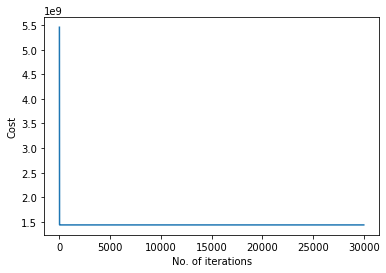

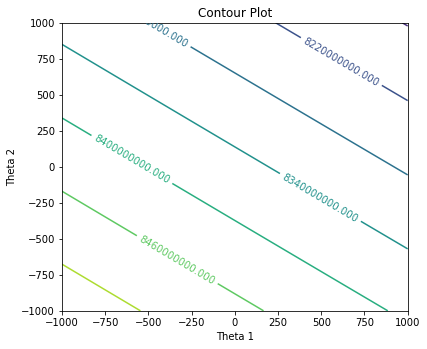

[[356228.84210526 128335.82693942 -14555.14122206]]
Average error: 239232611.04992825
RMS error: 247620434.22553387
[[ 1.00000000e+00  8.40512606e-02 -4.56171553e-01]
 [ 1.00000000e+00  8.40512606e-02 -4.56171553e-01]
 [ 1.00000000e+00 -5.92314177e-01 -4.56171553e-01]
 [ 1.00000000e+00 -5.92314177e-01 -4.56171553e-01]
 [ 1.00000000e+00  1.28647871e+00  9.88371698e-01]
 [ 1.00000000e+00 -5.92314177e-01 -4.56171553e-01]
 [ 1.00000000e+00 -7.56461345e-02  9.88371698e-01]
 [ 1.00000000e+00  1.28647871e+00  9.88371698e-01]
 [ 1.00000000e+00 -8.24479298e-01 -4.56171553e-01]
 [ 1.00000000e+00 -6.80885842e-01 -4.56171553e-01]
 [ 1.00000000e+00 -8.39241242e-01 -1.90071480e+00]
 [ 1.00000000e+00 -8.24479298e-01 -4.56171553e-01]
 [ 1.00000000e+00 -8.87553059e-01 -4.56171553e-01]
 [ 1.00000000e+00 -7.56461345e-02  9.88371698e-01]
 [ 1.00000000e+00 -7.56461345e-02  9.88371698e-01]
 [ 1.00000000e+00 -8.87553059e-01 -4.56171553e-01]
 [ 1.00000000e+00 -2.03135652e-01 -4.56171553e-01]
 [ 1.00000000e+00

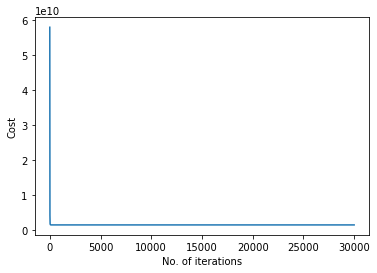

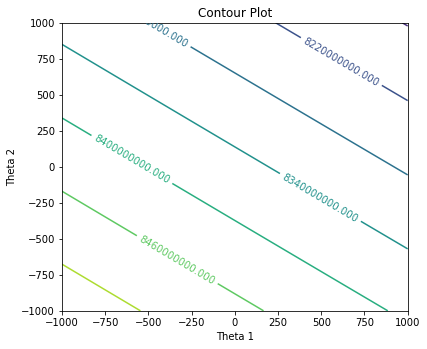

[[356228.84210526 128335.82693941 -14555.14122206]]
Average error: 239232611.04992506
RMS error: 247620434.22553056
[[ 1.00000000e+00  8.40512606e-02 -4.56171553e-01]
 [ 1.00000000e+00  8.40512606e-02 -4.56171553e-01]
 [ 1.00000000e+00 -5.92314177e-01 -4.56171553e-01]
 [ 1.00000000e+00 -5.92314177e-01 -4.56171553e-01]
 [ 1.00000000e+00  1.28647871e+00  9.88371698e-01]
 [ 1.00000000e+00 -5.92314177e-01 -4.56171553e-01]
 [ 1.00000000e+00 -7.56461345e-02  9.88371698e-01]
 [ 1.00000000e+00  1.28647871e+00  9.88371698e-01]
 [ 1.00000000e+00 -8.24479298e-01 -4.56171553e-01]
 [ 1.00000000e+00 -6.80885842e-01 -4.56171553e-01]
 [ 1.00000000e+00 -8.39241242e-01 -1.90071480e+00]
 [ 1.00000000e+00 -8.24479298e-01 -4.56171553e-01]
 [ 1.00000000e+00 -8.87553059e-01 -4.56171553e-01]
 [ 1.00000000e+00 -7.56461345e-02  9.88371698e-01]
 [ 1.00000000e+00 -7.56461345e-02  9.88371698e-01]
 [ 1.00000000e+00 -8.87553059e-01 -4.56171553e-01]
 [ 1.00000000e+00 -2.03135652e-01 -4.56171553e-01]
 [ 1.00000000e+00

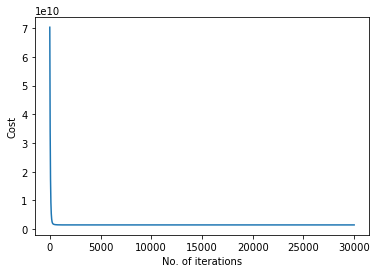

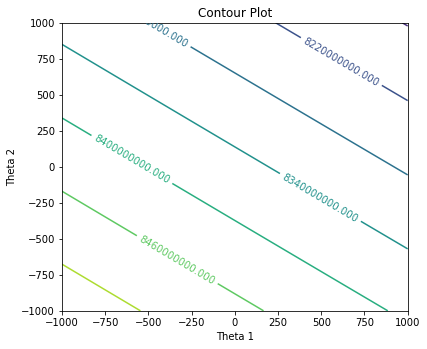

[[356228.84210523 128279.16772557 -14498.48200822]]
Average error: 239127187.13937134
RMS error: 247511295.29714718
[[ 1.00000000e+00  8.40512606e-02 -4.56171553e-01]
 [ 1.00000000e+00  8.40512606e-02 -4.56171553e-01]
 [ 1.00000000e+00 -5.92314177e-01 -4.56171553e-01]
 [ 1.00000000e+00 -5.92314177e-01 -4.56171553e-01]
 [ 1.00000000e+00  1.28647871e+00  9.88371698e-01]
 [ 1.00000000e+00 -5.92314177e-01 -4.56171553e-01]
 [ 1.00000000e+00 -7.56461345e-02  9.88371698e-01]
 [ 1.00000000e+00  1.28647871e+00  9.88371698e-01]
 [ 1.00000000e+00 -8.24479298e-01 -4.56171553e-01]
 [ 1.00000000e+00 -6.80885842e-01 -4.56171553e-01]
 [ 1.00000000e+00 -8.39241242e-01 -1.90071480e+00]
 [ 1.00000000e+00 -8.24479298e-01 -4.56171553e-01]
 [ 1.00000000e+00 -8.87553059e-01 -4.56171553e-01]
 [ 1.00000000e+00 -7.56461345e-02  9.88371698e-01]
 [ 1.00000000e+00 -7.56461345e-02  9.88371698e-01]
 [ 1.00000000e+00 -8.87553059e-01 -4.56171553e-01]
 [ 1.00000000e+00 -2.03135652e-01 -4.56171553e-01]
 [ 1.00000000e+00

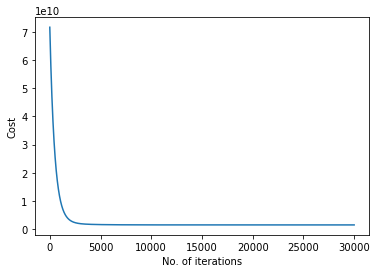

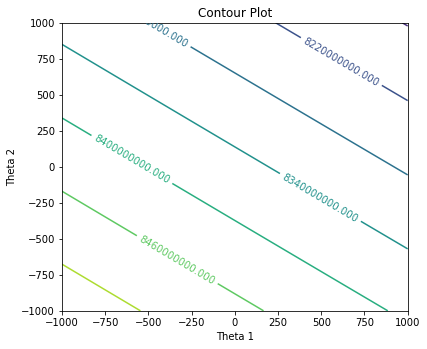

[[338495.91270505  93058.53280284  20146.53685362]]
Average error: 173573546.1955172
RMS error: 179648943.84056297
[[ 1.00000000e+00  8.40512606e-02 -4.56171553e-01]
 [ 1.00000000e+00  8.40512606e-02 -4.56171553e-01]
 [ 1.00000000e+00 -5.92314177e-01 -4.56171553e-01]
 [ 1.00000000e+00 -5.92314177e-01 -4.56171553e-01]
 [ 1.00000000e+00  1.28647871e+00  9.88371698e-01]
 [ 1.00000000e+00 -5.92314177e-01 -4.56171553e-01]
 [ 1.00000000e+00 -7.56461345e-02  9.88371698e-01]
 [ 1.00000000e+00  1.28647871e+00  9.88371698e-01]
 [ 1.00000000e+00 -8.24479298e-01 -4.56171553e-01]
 [ 1.00000000e+00 -6.80885842e-01 -4.56171553e-01]
 [ 1.00000000e+00 -8.39241242e-01 -1.90071480e+00]
 [ 1.00000000e+00 -8.24479298e-01 -4.56171553e-01]
 [ 1.00000000e+00 -8.87553059e-01 -4.56171553e-01]
 [ 1.00000000e+00 -7.56461345e-02  9.88371698e-01]
 [ 1.00000000e+00 -7.56461345e-02  9.88371698e-01]
 [ 1.00000000e+00 -8.87553059e-01 -4.56171553e-01]
 [ 1.00000000e+00 -2.03135652e-01 -4.56171553e-01]
 [ 1.00000000e+00 

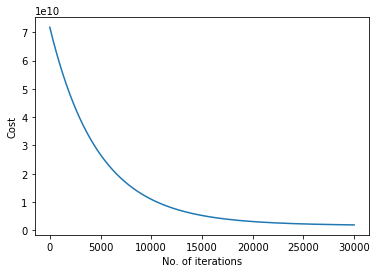

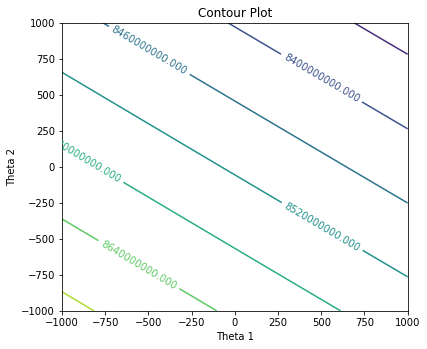

In [6]:

alp = 1.0
for a in range(5):
    main(alp, l, x_test, y_test)
    alp/=10

#main(0.001,l,x_test,y_test)

In [7]:
def BGD2(theta, alpha, num_iters, h, X, y, n, lam_par):
    cost = np.ones(num_iters, dtype=np.float64)
    for i in range(0,num_iters):
        theta[0] = theta[0] - (alpha/X.shape[0]) * sum(h - y)
        theta1 = 0.0
        for j in range(1,n+1):
            theta[j] = theta[j] - (alpha/X.shape[0]) * sum((h-y) * X.transpose()[j])
            theta1 += abs(theta[j])
        h = hypothesis(theta, X, n)
        
        cost[i] = (1.0/X.shape[0]) * 0.5 * float(sum(np.square(h - y))) + (float(lam_par) * theta1)
    theta = theta.reshape(1,n+1)
    return theta,cost
def linear_regression2(X, y, alpha, num_iters, lam_par):
    n = X.shape[1]
    one_column = np.ones((X.shape[0],1))
    X = np.concatenate((one_column, X), axis = 1)
    # initializing the parameter vector...
    theta = np.zeros(n+1)
    # hypothesis calculation....
    h = hypothesis(theta, X, n)
    # returning the optimized parameters by Gradient Descent...
    theta, cost = BGD2(theta,alpha,num_iters,h,X,y,n,lam_par)
    return theta, cost

In [8]:
import matplotlib.pyplot as plt
def main2(lam_par):
    theta, cost = linear_regression2(X_train, y_train,0.0001, 30000,lam_par)
    cost = list(cost)
    n_iterations = [x for x in range(1,30001)]
    plt.plot(n_iterations, cost)
    plt.title('Variation of Cost with Alpha after Regularization')
    plt.xlabel('No. of iterations')
    plt.ylabel('Cost')

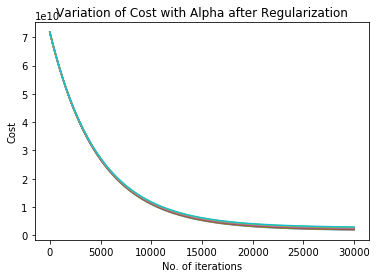

In [9]:
for l in range(0, 10000, 1000):
    main2(l)